# STATUATORY WARNING:
## PLEASE DO NOT ALTER THE CODE WITHOUT PERMISSION

### Cleaning the data

In [153]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import re

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer,PorterStemmer


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\850044344\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [155]:
df = pd.read_csv('dummy.csv')

In [156]:
df.head(2)

,Id,HtmlBody,HtmlBody(Clean Data),Predicted Class,Predicted Score
0,02s1r00001acKkkAAE,"good morning,\nplease could i have a response ...","payment query good morning, thank you for your...",Others,100.0
1,02s1r00001blgJyAAI,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,95.0


In [157]:
df.shape

(8744, 5)

In [158]:
df.isnull().sum()

Id                         0
HtmlBody                1837
HtmlBody(Clean Data)    1863
Predicted Class            0
Predicted Score            0
dtype: int64

In [159]:
df = df.dropna()

In [160]:
df.isnull().sum()

Id                      0
HtmlBody                0
HtmlBody(Clean Data)    0
Predicted Class         0
Predicted Score         0
dtype: int64

In [161]:
df.columns

Index(['Id', 'HtmlBody', 'HtmlBody(Clean Data)', 'Predicted Class',
       'Predicted Score'],
      dtype='object')

In [162]:
df =df.rename(columns={'HtmlBody(Clean Data)':'htmlbody_cleaned_data','Predicted Class':'Predicted_Class'})

In [163]:
df

,Id,HtmlBody,htmlbody_cleaned_data,Predicted_Class,Predicted Score
0,02s1r00001acKkkAAE,"good morning,\nplease could i have a response ...","payment query good morning, thank you for your...",Others,100.0
1,02s1r00001blgJyAAI,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,95.0
2,02s1r00001blgcRAAQ,hayley waterman\nkone plc\nexpense/accounts as...,statement from oasis products vending services...,Others,100.0
3,02s1r00001blj0aAAA,"dear requester,\nthank you for writing to us. ...","ees uk cis deductions hi, after speaking to sh...",Others,100.0
4,02s1r00001blj6TAAQ,"dear requester,\nthank you for writing to us. ...",securitas invoice processed twice in error hi ...,Others,100.0
5,02s1r00001blwqoAAA,dear sirs.\nplease respond with regards to the...,overdue invoice for vendor AHD_NUMBER please a...,Status,95.0
6,02s1r00001blz0lAAA,"dear requester,\nthank you for writing to us. ...",problem hi supplier number AHD_NUMBER problem ...,Others,100.0
7,02s1r00001bm0GBAAY,"dear requester,\nthank you for writing to us. ...",cis payment hi can you please solve this probl...,Escalation,62.0
8,02s1r00001bm0JoAAI,"dear requester,\nthank you for writing to us. ...",cis payment hi can you please solve this probl...,Escalation,62.0
9,02s1r00001bm1QWAAY,"dear requester,\nthank you for writing to us. ...",invoice AHD_NUMBER from control applications l...,Others,100.0


In [164]:
df =df.drop(['Predicted Score','HtmlBody'],axis=1)

In [165]:
df.head(2)

,Id,htmlbody_cleaned_data,Predicted_Class
0,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",Others
1,02s1r00001blgJyAAI,statement & queries please find attached up to...,Status


In [166]:
df.Predicted_Class.value_counts()

Others        5615
Status         832
Escalation     434
Name: Predicted_Class, dtype: int64

### Ishan's Clean 

In [167]:
# some words that should be removed during tokenization along with any website name and weird characters and proper nouns too
# dont remove good and morning alag se ig
# dont remove symbols like ! and ? which might express emotion
common_words = ['dear','sir',"ma'am",'maam','madam','sirs','AHD_NUMBER','AHD_DATE','AHD_ALPHANUM','AHD_EMAIL','please','invoice','date','regards','tel','telephone',
                'good morning','good afternoon','good evening','i look forward to hearing from you','fax','registered']
# For unclean data : 
# or maybe we can just remove everything after Disclaimer in sents_to_remove[0]
# subject also has to be removed from the unclean data
sents_to_remove = ['Disclaimer: If you have received this e-mail because of an addressing or delivery error, please inform the sender by replying to this e-mail and then delete it immediately. If you are not the intended recipient you must not use, disclose, distribute, copy, or print any of the information in it. Any opinions or views expressed in this message are those of the individual sender, except where the sender specifically states them to be otherwise. Big Yellow Group PLC takes no responsibility as to the presence of any viruses in this e-mail. Big Yellow Group PLC and associated companies. Registered in England and Wales No 3625199. Registered Office: 2 The Deans, Bridge Road, Bagshot, Surrey, GU19 5AT',
                  '']

In [168]:
# check all
pat_1 = re.compile(r'(kind regard.*)')
pat_2 = re.compile(r'(www\.[a-z0-9]+\.com.*)')
pat_3 = re.compile(r'( tel[\s:-].*)')
pat_4 = re.compile(r'( fax.*)')
pat_5 = re.compile(r'( t:.*)')
pat_6 = re.compile(r'( dial:-.*)')
pat_8 = re.compile(r'(cheers .*)')
pat_9 = re.compile(r'(regards,.*)')
pat_10 = re.compile(r'(confidentiality notice.*)')
pat_11 = re.compile(r'(virus.*)')
pat_12 = re.compile(r'(thank you\..*)')
pat_13 = re.compile(r'(bank name:.*)')
pat_14 = re.compile(r'(registered office:.*)')
pat_15 = re.compile(r'(please note my hours.*)')
pat_16 = re.compile(r'(environment before printing.*)')
pat_17 = re.compile(r'(this message is intended.*)')

list_of_pats = [pat_1,pat_2,pat_3,pat_4,pat_5,pat_6,pat_8,pat_9,pat_10,pat_11,pat_12,pat_13,pat_14,pat_15,pat_16,pat_17]

def clean(list_of_pats, list_of_words):
    for i in list_of_pats:
        if i == pat_1:
            df['clean'] = df.htmlbody_cleaned_data.str.replace(pat_1,'')
        else:
            df['clean'] = df.clean.str.replace(i,'')
    for i in list_of_words:
        df.clean = df.clean.str.replace(i,'')
#         df_true = df[df.clean.str.contains(i) == True]
#         df.loc[df_true.index.values,'clean'] = df_true.final_body.str.replace(i,'')
    return df

df = clean(list_of_pats,common_words)

In [169]:
df['final_body'] = df.clean

In [170]:
list1 = df['final_body'].tolist()
str2 =""
list_append = []
for str1 in list1:
    str2 = ""
    for i in str1:
        if 0<ord(i)<128:
            str2+=i
    list_append.append(str2)
list_append

['payment query , thank you for your remittance. transaction   has been processed as a credit note, this is an  see attached.  can you reverse the credit and process the . also the following s remain unpaid and are now overdue.   due    due    due   respond by return advising of the payment  to avoid late payment charges being issued.',
 'statement & queries  find attached up to  statement showing all s & queries outstanding up to   advise when the s from   oct.  will be processed for payment.',
 'statement from oasis products vending services ltd for kone plc ',
 'ees uk cis deductions hi, after speaking to sheila earlier regarding cis deductions that kone have made on our s since september, she advised that we should not be deducted any cis at source. could you  advise why this has happened and confirm hat you will be processing payment of outstanding balances on part-paid s. if you require further information on these balances,  do not hesitate to ask.',
 'securitas  processed twice

In [171]:
df["final_cleaned_body"] =np.array(list_append)

In [172]:
df

,Id,htmlbody_cleaned_data,Predicted_Class,clean,final_body,final_cleaned_body
0,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",Others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,02s1r00001blgJyAAI,statement & queries please find attached up to...,Status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,02s1r00001blgcRAAQ,statement from oasis products vending services...,Others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...
3,02s1r00001blj0aAAA,"ees uk cis deductions hi, after speaking to sh...",Others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,02s1r00001blj6TAAQ,securitas invoice processed twice in error hi ...,Others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."
5,02s1r00001blwqoAAA,overdue invoice for vendor AHD_NUMBER please a...,Status,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...
6,02s1r00001blz0lAAA,problem hi supplier number AHD_NUMBER problem ...,Others,problem hi supplier number problem – cis sh...,problem hi supplier number problem – cis sh...,problem hi supplier number problem cis sho...
7,02s1r00001bm0GBAAY,cis payment hi can you please solve this probl...,Escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
8,02s1r00001bm0JoAAI,cis payment hi can you please solve this probl...,Escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
9,02s1r00001bm1QWAAY,invoice AHD_NUMBER from control applications l...,Others,from control applications limited note the...,from control applications limited note the...,from control applications limited note the...


In [173]:
df.to_csv("Cleaned_Dummy_Data.csv")

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# WORKING WITH NEWLY CREATED CSV FILE

In [174]:
ds=pd.read_csv('Cleaned_Dummy_Data.csv')

In [175]:
ds.head(2)

,Unnamed: 0,Id,htmlbody_cleaned_data,Predicted_Class,clean,final_body,final_cleaned_body
0,0,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",Others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,1,02s1r00001blgJyAAI,statement & queries please find attached up to...,Status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...


# this is actual count

In [176]:
ds.Predicted_Class.value_counts()

Others        5615
Status         832
Escalation     434
Name: Predicted_Class, dtype: int64

In [177]:
ds.columns

Index(['Unnamed: 0', 'Id', 'htmlbody_cleaned_data', 'Predicted_Class', 'clean',
       'final_body', 'final_cleaned_body'],
      dtype='object')

In [178]:
ds= ds.drop(['Unnamed: 0','Id','htmlbody_cleaned_data','clean','final_body'],axis=1)

In [179]:
ds.head(2)

,Predicted_Class,final_cleaned_body
0,Others,"payment query , thank you for your remittance...."
1,Status,statement & queries find attached up to stat...


In [180]:
ds.isnull().sum()

Predicted_Class        0
final_cleaned_body    30
dtype: int64

In [181]:
l =ds[ds['final_cleaned_body'].isnull()].index.tolist()

In [182]:
l

[178,
 237,
 254,
 258,
 261,
 294,
 300,
 407,
 550,
 563,
 587,
 693,
 730,
 854,
 870,
 938,
 1023,
 1089,
 1207,
 1739,
 2077,
 2492,
 2493,
 2565,
 2909,
 3335,
 3971,
 4414,
 5567,
 6859]

In [183]:
ds.loc[l]

,Predicted_Class,final_cleaned_body
178,Others,NaN
237,Others,NaN
254,Others,NaN
258,Others,NaN
261,Others,NaN
294,Others,NaN
300,Others,NaN
407,Others,NaN
550,Others,NaN
563,Others,NaN


## 1st Drop for removal of  30 rows having Null Values in column final_cleaned_body all belonging to Predicted_Class = Others

In [184]:
ds=ds.dropna()


In [185]:
ds.isnull().sum()

Predicted_Class       0
final_cleaned_body    0
dtype: int64

In [186]:
ds.Predicted_Class.value_counts()

Others        5585
Status         832
Escalation     434
Name: Predicted_Class, dtype: int64

# applying k means clustering to identify the number of clusters and visulization

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [188]:
cv = CountVectorizer()

In [189]:
X = cv.fit_transform(ds['final_cleaned_body'])

In [190]:
X

<6851x5732 sparse matrix of type '<class 'numpy.int64'>'
	with 195585 stored elements in Compressed Sparse Row format>

In [191]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(ds['final_cleaned_body'])

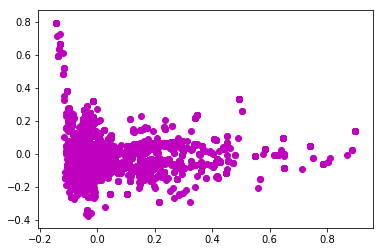

In [192]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [193]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [194]:
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 10))

      features     score
0      queries  0.496445
1          oct  0.492582
2    statement  0.373664
3      showing  0.373636
4    processed  0.293376
5  outstanding  0.231687
6       advise  0.218244
7     attached  0.149488
8      payment  0.148160
9       fields  0.000000


In [195]:
# COMMENTED BACAUSE IT DELAYS THE PROCESS A LOT

# from sklearn.cluster import KMeans
# wcss =[]
# for i in range(1,20):
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(range(1,20),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('wcss')
# plt.show()

In [196]:
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [197]:
labels

array([0, 1, 0, ..., 2, 0, 0])

In [198]:
labels.view

<function ndarray.view>

In [199]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

In [200]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

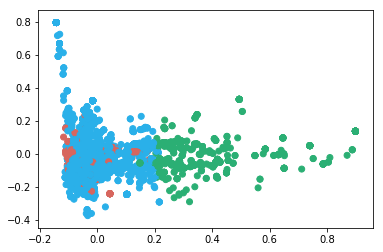

In [201]:
plt.scatter(coords[:, 0], coords[:, 1], c=colors)


In [202]:
fig1 =plt.gcf()

<Figure size 432x288 with 0 Axes>

In [203]:
plt.show()
plt.draw()
fig1.savefig("test.jpg",dpi=100)

<Figure size 432x288 with 0 Axes>

In [204]:
print(clf.labels_)

[0 1 0 ... 2 0 0]


In [205]:
sum(clf.labels_ == 0)/clf.labels_.shape[0]

0.7830973580499198

In [206]:
sum(clf.labels_ == 1)/clf.labels_.shape[0]

0.08699459932856517

In [207]:
sum(clf.labels_ == 2)/clf.labels_.shape[0]

0.12990804262151512

In [208]:
labels = pd.Series(clf.labels_, name = 'labels')

In [209]:
ds = pd.concat([ds, labels],axis = 1)

In [210]:
ds['maped_labs']= ds['Predicted_Class'].map({'Escalation':2,'Others':1,'Status':0})

In [211]:
ds

,Predicted_Class,final_cleaned_body,labels,maped_labs
0,Others,"payment query , thank you for your remittance....",0.0,1.0
1,Status,statement & queries find attached up to stat...,1.0,0.0
2,Others,statement from oasis products vending services...,0.0,1.0
3,Others,"ees uk cis deductions hi, after speaking to sh...",0.0,1.0
4,Others,"securitas processed twice in error hi all, d...",0.0,1.0
5,Status,overdue for vendor advise on the payment of...,0.0,0.0
6,Others,problem hi supplier number problem cis sho...,0.0,1.0
7,Escalation,cis payment hi can you solve this problem reg...,0.0,2.0
8,Escalation,cis payment hi can you solve this problem reg...,0.0,2.0
9,Others,from control applications limited note the...,0.0,1.0


In [212]:
# ds['category_id'] = ds['Predicted_Class'].factorize()[0]
# category_id_df = ds[['Predicted_Class', 'category_id']].drop_duplicates()


# Categorical Visulization

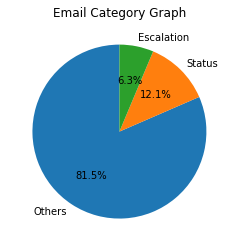

<Figure size 432x288 with 0 Axes>

In [213]:
category_numeric_val =[5585,832,434]
categories =['Others','Status','Escalation']
plt.pie(category_numeric_val,labels=categories,startangle=90,autopct='%.1f%%')
plt.title('Email Category Graph')
# fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('image.png', dpi=100)

In [214]:
ds.Predicted_Class.value_counts()

Others        5585
Status         832
Escalation     434
Name: Predicted_Class, dtype: int64

# Remove the unnecessary columns labels and maped labels as both of them do not contribute well in Data Modelling, so better drop those 2 columns 

In [215]:
ds=ds.drop(columns=['labels','maped_labs'])

In [216]:
ds.head(2)

,Predicted_Class,final_cleaned_body
0,Others,"payment query , thank you for your remittance...."
1,Status,statement & queries find attached up to stat...


# Count Actual vs Unique vs Duplicate Values

In [217]:
data = ds.groupby('Predicted_Class').size().reset_index(name='Count').rename(columns={'Predicted_Class':'Col_value'})
print (data)

    Col_value  Count
0  Escalation    434
1      Others   5585
2      Status    832


### For Drop 2

In [218]:
# ds.isnull().sum()

In [219]:
# ds.to_csv("to_Check_the_null_values.csv")

In [220]:
# l2 =ds[ds['labels'].isnull()].index.tolist()

In [221]:
# len(l2)

In [222]:
# l2

In [223]:
# drop_2=ds.loc[l2]

In [224]:
# drop_2

## To show the drop of Rows belonging to Given Individual Categories

### For status

In [225]:
# s=drop_2.loc[(ds["Predicted_Class"]=="Status") & (drop_2 ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [226]:
# s

### For Escalation

In [227]:
# e=drop_2.loc[(ds["Predicted_Class"]=="Escalation") & (drop_2 ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [228]:
# e

### For Others

In [229]:
# o=drop_2.loc[(ds["Predicted_Class"]=="Others") & (drop_2 ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [230]:
# o.Predicted_Class.value_counts()

In [231]:
# o

## Second Drop of 29 rows 

In [232]:
# ds =ds.dropna()


In [233]:
# ds.isnull().sum()

In [234]:
# ds.Predicted_Class.value_counts()

In [235]:
ds.columns

Index(['Predicted_Class', 'final_cleaned_body'], dtype='object')

In [236]:
ds.head(2)

,Predicted_Class,final_cleaned_body
0,Others,"payment query , thank you for your remittance...."
1,Status,statement & queries find attached up to stat...


In [237]:
status=ds.loc[(ds["Predicted_Class"]=="Status") & (ds ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [238]:
status.head(2)

,Predicted_Class,final_cleaned_body
1,Status,statement & queries find attached up to stat...
5,Status,overdue for vendor advise on the payment of...


In [239]:
status.final_cleaned_body.nunique(dropna = True) 

417

## total unique values in column = final_body for status = 414 out of actual total of 829 ,hence duplicate values = actual total - unique i.e 829-414=415

In [240]:
escalation=ds.loc[(ds["Predicted_Class"]=="Escalation") & (ds ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [241]:
escalation.head(2)

,Predicted_Class,final_cleaned_body
7,Escalation,cis payment hi can you solve this problem reg...
8,Escalation,cis payment hi can you solve this problem reg...


In [242]:
escalation.final_cleaned_body.nunique(dropna = True) 

209

## total unique values in column = final_body for escalation= 209 out of actual total of 433,hence duplicate values = actual total - unique i.e 433-209=224

In [243]:
others=ds.loc[(ds["Predicted_Class"]=="Others") & (ds ["final_cleaned_body"]), ["Predicted_Class","final_cleaned_body"]]

In [244]:
others.head(2)

,Predicted_Class,final_cleaned_body
0,Others,"payment query , thank you for your remittance...."
2,Others,statement from oasis products vending services...


In [245]:
others.final_cleaned_body.nunique(dropna = True) 

2568

### total unique values in column = final_body for others= 2556 out of actual total of 5560,hence duplicate values = actual total - unique i.e 5560-2556=3004

# Table for Comparision of Actual vs Unique vs Duplicate Count in Emails for each Predicted Class

| Predicted_Class | Actual Count | After 1st drop (30 rows)| Unique Count | Duplicate Count |
|-----------------|--------------|-------------------------|--------------|-----------------|
| Status          | 832          | 832                     | 417          | 415             |
| Escalation      | 434          | 434                     | 209          | 225             |
| Others          | 5615         | 5585                    | 2568         | 3047            |
|-----------------|--------------|-------------------------|--------------|-----------------|
| TOTAL           | 6881         | 6851 +30=6881           | 3194         | 3687            |
|-----------------|--------------|------------------------ |--------------|-----------------|



###        |                            ACTUAL = SUM OF DUPLICATES + UNIQUE i.e 3194+3687=6881                         |

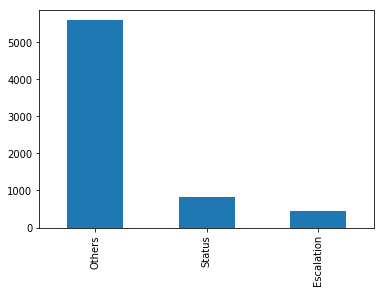

In [246]:
ds['Predicted_Class'].value_counts().plot(kind='bar')

# Modelling 

In [247]:
# Performing The Basics

In [248]:
data = pd.read_csv('Cleaned_Dummy_Data.csv')


In [249]:
data['category_id'] = data['Predicted_Class'].factorize()[0]
category_id_df = data[['Predicted_Class', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Predicted_Class']].values)

In [250]:
data.head()

,Unnamed: 0,Id,htmlbody_cleaned_data,Predicted_Class,clean,final_body,final_cleaned_body,category_id
0,0,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",Others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance....",0
1,1,02s1r00001blgJyAAI,statement & queries please find attached up to...,Status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...,1
2,2,02s1r00001blgcRAAQ,statement from oasis products vending services...,Others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...,0
3,3,02s1r00001blj0aAAA,"ees uk cis deductions hi, after speaking to sh...",Others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...",0
4,4,02s1r00001blj6TAAQ,securitas invoice processed twice in error hi ...,Others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...",0


In [251]:
data.columns

Index(['Unnamed: 0', 'Id', 'htmlbody_cleaned_data', 'Predicted_Class', 'clean',
       'final_body', 'final_cleaned_body', 'category_id'],
      dtype='object')

In [252]:
data =data.drop(columns=['Unnamed: 0', 'Id', 'htmlbody_cleaned_data', 'clean','final_body'])

In [253]:
data.head(2)

,Predicted_Class,final_cleaned_body,category_id
0,Others,"payment query , thank you for your remittance....",0
1,Status,statement & queries find attached up to stat...,1


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6881 entries, 0 to 6880
Data columns (total 3 columns):
Predicted_Class       6881 non-null object
final_cleaned_body    6851 non-null object
category_id           6881 non-null int64
dtypes: int64(1), object(2)
memory usage: 161.4+ KB


In [255]:
data.Predicted_Class.value_counts()

Others        5615
Status         832
Escalation     434
Name: Predicted_Class, dtype: int64

In [256]:
data.isnull().sum()

Predicted_Class        0
final_cleaned_body    30
category_id            0
dtype: int64

In [257]:
data=data.dropna()

In [258]:
data.isnull().sum()

Predicted_Class       0
final_cleaned_body    0
category_id           0
dtype: int64

In [259]:
X =data.final_cleaned_body
y =data.Predicted_Class

In [260]:
X.head()

0    payment query , thank you for your remittance....
1    statement & queries  find attached up to  stat...
2    statement from oasis products vending services...
3    ees uk cis deductions hi, after speaking to sh...
4    securitas  processed twice in error hi all,  d...
Name: final_cleaned_body, dtype: object

In [261]:
y.head()

0    Others
1    Status
2    Others
3    Others
4    Others
Name: Predicted_Class, dtype: object

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [263]:
X_train.shape

(5480,)

In [264]:
y_train.value_counts()

Others        4463
Status         667
Escalation     350
Name: Predicted_Class, dtype: int64

# extracting features from text files

In [265]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(5480, 5251)

### matrix states for 5480 samples par 5251 features detect hue hai

# (TF - Term Frequencies) i.e. #count(word) / #Total words, in each document.

In [266]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5480, 5251)

# NAIVE BAYES ALGORITHM 

In [267]:
# Training will be done against X_train_tfidf and y_train

In [268]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,y_train)

In [269]:
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [270]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [271]:
print(text_clf)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])


In [272]:
text_clf = text_clf.fit(X_train, y_train)

In [273]:
print(X_train.head())

3239    kuehne + nagel ireland limited - statement of ...
3227    hello i sent an  of in the  february and still...
1570    oustanding s importance: high  derek, can you ...
423                 statement of account from faac uk ltd
4160               from e r s  limerick for kone ltd null
Name: final_cleaned_body, dtype: object


In [274]:
import numpy as np
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.8300510576221736

In [275]:
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## SO NAIVE BAYES GIVES ACCURACY OF 83% ; ) 

# Model optimisation using GridSearchCV for Naive Bayes

In [276]:
from sklearn.model_selection import GridSearchCV

In [277]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

In [278]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train,y_train)

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [279]:
gs_clf.best_score_


0.958029197080292

In [280]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

## Ohhh My Gawd Improved accuracy = 95%

# Support Vector Machine 

In [281]:
from sklearn.linear_model import SGDClassifier

In [282]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)),])

In [283]:
text_clf_svm

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [284]:
_ = text_clf_svm.fit(X_train, y_train)

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [285]:
predicted_svm = text_clf_svm.predict(X_test)

In [286]:
np.mean(predicted_svm == y_test)

0.8927789934354485

# Model optimisation using GridSearchCV for Support Vector Machine

In [287]:
from sklearn.model_selection import GridSearchCV


In [288]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

In [289]:
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)

In [290]:
gs_clf_svm = gs_clf_svm.fit(X_train,y_train)

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [291]:
gs_clf_svm.best_score_

0.8968978102189781

In [292]:
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [293]:
# Classification report

In [294]:
#Precision, Recall, F1-score

In [295]:
data.head()

,Predicted_Class,final_cleaned_body,category_id
0,Others,"payment query , thank you for your remittance....",0
1,Status,statement & queries find attached up to stat...,1
2,Others,statement from oasis products vending services...,0
3,Others,"ees uk cis deductions hi, after speaking to sh...",0
4,Others,"securitas processed twice in error hi all, d...",0


In [296]:
print('\t\t    CLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test,predicted_svm ,target_names= data['Predicted_Class'].unique()))

		    CLASSIFICATIION METRICS

              precision    recall  f1-score   support

      Others       1.00      0.42      0.59        84
      Status       0.89      1.00      0.94      1122
  Escalation       0.95      0.43      0.59       165

   micro avg       0.89      0.89      0.89      1371
   macro avg       0.94      0.61      0.71      1371
weighted avg       0.90      0.89      0.88      1371



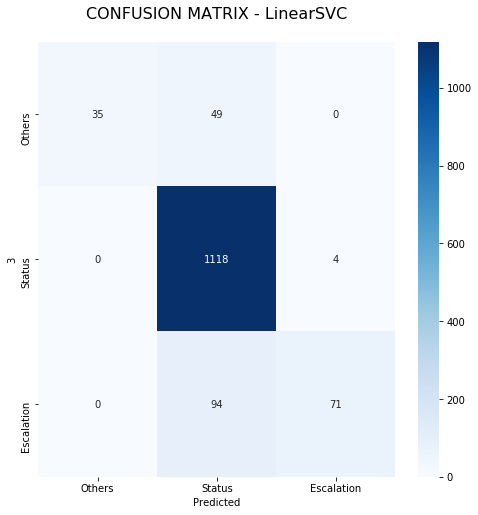

In [297]:
conf_mat = confusion_matrix(y_test,predicted_svm)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Predicted_Class.values, 
            yticklabels=category_id_df.Predicted_Class.values)
plt.ylabel('3')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [298]:
# Total Misclassification

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],id_to_category[predicted],conf_mat[actual, predicted]))
#              display(data.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Predicted_Class','final_cleaned_body']])
            print('')

'Others' predicted as 'Status' : 49 examples.

'Escalation' predicted as 'Status' : 94 examples.

